## Microsoft's Studios: Rise to the Surface


In this notebook, we will use data from Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers to gain insight on how the new Microsoft Movie studio should proceed in content creation to maximize ratings, reviews, and profit. The data we are using is important and helpful to this case because the information within the data can help us narrow down which genres of movies were well received and yielded higher ratings and grossed higher earnings.

So it looks like we need to join/merge the different tables so we can get the names/ratings/reviews etc matching

ratings with titles on tconstant

once we have the titles we can join the other sets that have the movie names

## business understanding top top explaining the goal and identify questions

diff sections
explain where the data comes from/source
prep explain cleaning
analysis/understanding - recs
conclusion section tying it back in to general overview/main question


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Data

In [3]:
imdb_title_df   = pd.read_csv    ('../zippedData/imdb.title.basics.csv.gz')
imdb_title_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


- Eyeballing the data sets to see how many data points we have, what we need to change, and how we can merge the sets together to get a better understanding of our data.

In this set, we have the average ratings for 73,856 and the number of votes for movies/'tconst'.

In [4]:
imdb_ratings = pd.read_csv('../zippedData/imdb.title.ratings.csv.gz')
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [5]:
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In this data set, we have the name of different employees in the industry and their profession and what titles they're known for. Unsure of how we can use the birth and death years. Will probably drop those two

In [6]:
imdb_title_df = pd.read_csv('../zippeddata/imdb.name.basics.csv.gz')
imdb_title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In this data set, we have those same employees on 'nconst' with a more defined category of their position on each movie title 'tconst'. This set seems more useful to define what movies a certain person worked on to see the successs of a movie in relation to the artist.

In [7]:
imdb_principals = pd.read_csv('../zippeddata/imdb.title.principals.csv.gz')
imdb_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [8]:
imdb_name_basics = pd.read_csv('../zippedData/imdb.name.basics.csv.gz')

This dataset has the names of the movies in relation to the title_id/'tconst'. We can use the 'title_id' renamed as 'tconst' to merge the sets together.

In [9]:
imdb_akas = pd.read_csv('../zippeddata/imdb.title.akas.csv.gz')
imdb_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [10]:
imdb_akas.rename(columns = {'title_id': 'tconst'}, inplace=True)

This dataset has the directors and writers associated with each movie.

In [11]:
imdb_crew = pd.read_csv('../zippedData/imdb.title.crew.csv.gz')
imdb_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


This data set has genre_ids as integers. We should try to find the associating genre with the ID. It also shows the popularity, releae date, average, and vote count for different movies.

In [12]:
#tmdb_movies = pd.read_csv('../zippedData/tmdb.movies.csv.gz', index_col=0)
#tmdb_movies = tmdb_movies.drop('id', axis=1)
#tmdb_movies.info()

This data set has movie titles with the production budget, domestic gross, and the worldwide gross. We can merge the movie titles with the ratings to see how the ratings of movies stack up against the budget and gross.

In [13]:
tn_df = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz', index_col=0)


In [14]:
tn_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


## Merging IMDB Ratings Dataset with IMDB Titles

Here we are merging the IMDB name/titles set with the ratings and the directors and writers.

In [15]:
imdb_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tconst             331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [16]:
imdb_akas.rename(columns = {'title_id': 'tconst'}, inplace=True)
imdb_akas

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [17]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [18]:
imdb_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [19]:
imdb_df = pd.merge(imdb_akas, imdb_ratings, on='tconst', how='inner')
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261806 entries, 0 to 261805
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tconst             261806 non-null  object 
 1   ordering           261806 non-null  int64  
 2   title              261806 non-null  object 
 3   region             218341 non-null  object 
 4   language           37080 non-null   object 
 5   types              153268 non-null  object 
 6   attributes         12924 non-null   object 
 7   is_original_title  261806 non-null  float64
 8   averagerating      261806 non-null  float64
 9   numvotes           261806 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 22.0+ MB


In [19]:
people_df = pd.merge(imdb_principals, imdb_name_basics, on='nconst', how='left')
people_df

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
3,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack",tt0323808
...,...,...,...,...,...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]",Kenneth Cranham,1944.0,NaN,"actor,soundtrack","tt0095294,tt0375912,tt0063385,tt0985699"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]",Pearl Mackie,1987.0,NaN,actress,"tt9676034,tt5498354,tt0436992,tt8972256"
1028183,tt9692684,3,nm10441594,director,NaN,NaN,Guy Jones,NaN,NaN,director,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN,Sabrina Mahfouz,NaN,NaN,writer,"tt5191128,tt3254170,tt2319282,tt8452302"


In [20]:
imdb_df_people_df = pd.merge(imdb_df, people_df, on='tconst', how='left')
imdb_df_people_df

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,averagerating,numvotes,ordering_y,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338.0,10.0,nm0189777,producer,producer,NaN,Patrick Crowley,NaN,NaN,"producer,assistant_director,production_manager","tt0372183,tt1059786,tt0258463,tt0440963"
1,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338.0,1.0,nm0695435,actor,NaN,"[""Owen""]",Chris Pratt,1979.0,NaN,"actor,soundtrack,producer","tt1490017,tt0369610,tt1266020,tt2015381"
2,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338.0,2.0,nm0397171,actress,NaN,"[""Claire""]",Bryce Dallas Howard,1981.0,NaN,"actress,director,writer","tt1454029,tt0369610,tt1800302"
3,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338.0,3.0,nm1339223,actor,NaN,"[""Gray""]",Ty Simpkins,NaN,NaN,actor,"tt0369610,tt1300854,tt4154796,tt1591095"
4,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338.0,4.0,nm0339460,actress,NaN,"[""Karen""]",Judy Greer,1975.0,NaN,"actress,producer,soundtrack","tt0369610,tt0337563,tt0478970,tt0988595"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841271,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0,NaN,NaN,5.0,nm1567587,producer,producer,NaN,Iñigo Fernández Ostolaza,NaN,NaN,"editor,producer,director","tt0254455,tt7524694,tt9880178,tt0471112"
2841272,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0,NaN,NaN,6.0,nm7279677,cinematographer,NaN,NaN,Javier de Usabel,NaN,NaN,"camera_department,cinematographer,art_department","tt4948838,tt7002576,tt8951078,tt4164866"
2841273,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0,NaN,NaN,7.0,nm1341556,self,NaN,"[""Himself""]",Jaime Jaimes,NaN,NaN,director,"tt0358405,tt0451590"
2841274,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0,NaN,NaN,8.0,nm4242087,self,NaN,"[""Herself""]",Amparo Malo,NaN,NaN,actress,"tt5159898,tt1805202"


In [21]:
imdb_df_people_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2841276 entries, 0 to 2841275
Data columns (total 20 columns):
 #   Column              Dtype  
---  ------              -----  
 0   tconst              object 
 1   ordering_x          int64  
 2   title               object 
 3   region              object 
 4   language            object 
 5   types               object 
 6   attributes          object 
 7   is_original_title   float64
 8   averagerating       float64
 9   numvotes            float64
 10  ordering_y          float64
 11  nconst              object 
 12  category            object 
 13  job                 object 
 14  characters          object 
 15  primary_name        object 
 16  birth_year          float64
 17  death_year          float64
 18  primary_profession  object 
 19  known_for_titles    object 
dtypes: float64(6), int64(1), object(13)
memory usage: 455.2+ MB


## Filtering out International and Duplicate Names


Below we can see we have multiple names for a single move as it was released in several different markets. We want to isolate and get a single movie title we're familiar with and use that one. We made the decision to subset the US region to get a standard US release title. We filtered out all the different types of release titles as well.

In [22]:
#imdb_df['tconst'].value_counts()

In [23]:
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['region'] == 'US']

Below we can see there's different titles for a single movie and we can filter those out.

In [24]:
#imdb_df_people_df['attributes'].value_counts()

In [25]:
#imdb_df_people_df['types'].value_counts()

In [26]:
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'fake working title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'informal short title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'promotional title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['types'] != 'working']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'IMAX version']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'poster title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'informal title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != '3-D version']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'director\'s cut']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'alternative spelling']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'informal alternative title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'long title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'short title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['types'] != 'alternative']

## Removing None and Low Votes

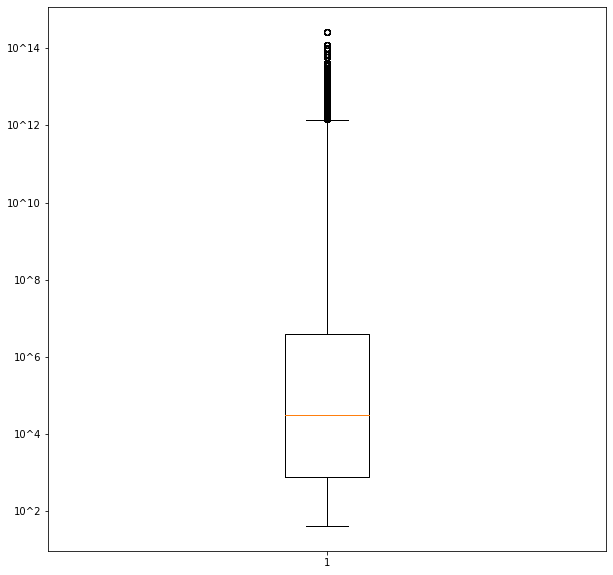

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot(np.log(imdb_df_people_df['numvotes'].dropna()));
ax.set_yticks(np.arange(2, 15, 2))
ax.set_yticklabels(['10^2', '10^4', '10^6', '10^8', '10^10', '10^12', '10^14']);

We will filter out movies with less than 10^3 votes

In [28]:
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['numvotes'] >= 10000]
imdb_df_people_df = imdb_df_people_df.dropna(subset=['numvotes'])

In [29]:
imdb_df_people_df = imdb_df_people_df[['tconst', 'title', 'averagerating', 'numvotes', 'category', 'primary_name', 'nconst']]

## Merging the IMDB dataset  To the Numbers Dataset

Renaming the movie column header to title to join tables together.

In [30]:
tn_df.rename(columns = {'movie': 'title'}, inplace=True)
tn_df

,release_date,title,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [31]:
imdb_tndb = pd.merge(imdb_df_people_df, tn_df, on='title', how='inner')
imdb_tndb

,tconst,title,averagerating,numvotes,category,primary_name,nconst,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0369610,Jurassic World,7.0,539338.0,producer,Patrick Crowley,nm0189777,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
1,tt0369610,Jurassic World,7.0,539338.0,actor,Chris Pratt,nm0695435,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
2,tt0369610,Jurassic World,7.0,539338.0,actress,Bryce Dallas Howard,nm0397171,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
3,tt0369610,Jurassic World,7.0,539338.0,actor,Ty Simpkins,nm1339223,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
4,tt0369610,Jurassic World,7.0,539338.0,actress,Judy Greer,nm0339460,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
...,...,...,...,...,...,...,...,...,...,...,...
12007,tt6139732,Aladdin,7.4,57549.0,producer,Jonathan Eirich,nm3043818,"Nov 11, 1992","$28,000,000","$217,350,219","$504,050,219"
12008,tt6139732,Aladdin,7.4,57549.0,producer,Dan Lin,nm1469853,"May 24, 2019","$182,000,000","$246,734,314","$619,234,314"
12009,tt6139732,Aladdin,7.4,57549.0,producer,Dan Lin,nm1469853,"Nov 11, 1992","$28,000,000","$217,350,219","$504,050,219"
12010,tt6139732,Aladdin,7.4,57549.0,composer,Alan Menken,nm0579678,"May 24, 2019","$182,000,000","$246,734,314","$619,234,314"


## Changing the data type of monetary values from string into float

In [32]:
imdb_tndb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12012 entries, 0 to 12011
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             12012 non-null  object 
 1   title              12012 non-null  object 
 2   averagerating      12012 non-null  float64
 3   numvotes           12012 non-null  float64
 4   category           12012 non-null  object 
 5   primary_name       12012 non-null  object 
 6   nconst             12012 non-null  object 
 7   release_date       12012 non-null  object 
 8   production_budget  12012 non-null  object 
 9   domestic_gross     12012 non-null  object 
 10  worldwide_gross    12012 non-null  object 
dtypes: float64(2), object(9)
memory usage: 1.1+ MB


In [33]:
imdb_tndb['domestic_gross'] = imdb_tndb['domestic_gross'].str.replace(',','')
imdb_tndb['domestic_gross'] = imdb_tndb['domestic_gross'].str.replace('$','')
imdb_tndb['domestic_gross'] = imdb_tndb['domestic_gross'].astype(float)

In [34]:
imdb_tndb['production_budget'] = imdb_tndb['production_budget'].str.replace(',','')
imdb_tndb['production_budget'] = imdb_tndb['production_budget'].str.replace('$','')
imdb_tndb['production_budget'] = imdb_tndb['production_budget'].astype(float)

In [35]:
imdb_tndb['worldwide_gross'] = imdb_tndb['worldwide_gross'].str.replace(',','')
imdb_tndb['worldwide_gross'] = imdb_tndb['worldwide_gross'].str.replace('$','')
imdb_tndb['worldwide_gross'] = imdb_tndb['worldwide_gross'].astype(float)

## Adding Profit Margin Column and ratio of Production Budget to Worldwide Gross


In [36]:
imdb_tndb['Profit_Margin'] = ((imdb_tndb['worldwide_gross'] - imdb_tndb['production_budget']) / imdb_tndb['worldwide_gross'])*100
imdb_tndb['ratio_budget_gross'] = (imdb_tndb['production_budget'] / imdb_tndb['worldwide_gross'])
imdb_tndb['ratio_budget_gross_%'] = imdb_tndb['ratio_budget_gross']*100

## Filtering out rows with domestic and worldwide gross is zero

In [37]:
imdb_tndb = imdb_tndb[imdb_tndb['worldwide_gross'] > 0]
imdb_tndb

,tconst,title,averagerating,numvotes,category,primary_name,nconst,release_date,production_budget,domestic_gross,worldwide_gross,Profit_Margin,ratio_budget_gross,ratio_budget_gross_%
0,tt0369610,Jurassic World,7.0,539338.0,producer,Patrick Crowley,nm0189777,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,86.960647,0.130394,13.039353
1,tt0369610,Jurassic World,7.0,539338.0,actor,Chris Pratt,nm0695435,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,86.960647,0.130394,13.039353
2,tt0369610,Jurassic World,7.0,539338.0,actress,Bryce Dallas Howard,nm0397171,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,86.960647,0.130394,13.039353
3,tt0369610,Jurassic World,7.0,539338.0,actor,Ty Simpkins,nm1339223,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,86.960647,0.130394,13.039353
4,tt0369610,Jurassic World,7.0,539338.0,actress,Judy Greer,nm0339460,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,86.960647,0.130394,13.039353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12007,tt6139732,Aladdin,7.4,57549.0,producer,Jonathan Eirich,nm3043818,"Nov 11, 1992",28000000.0,217350219.0,5.040502e+08,94.444998,0.055550,5.555002
12008,tt6139732,Aladdin,7.4,57549.0,producer,Dan Lin,nm1469853,"May 24, 2019",182000000.0,246734314.0,6.192343e+08,70.608864,0.293911,29.391136
12009,tt6139732,Aladdin,7.4,57549.0,producer,Dan Lin,nm1469853,"Nov 11, 1992",28000000.0,217350219.0,5.040502e+08,94.444998,0.055550,5.555002
12010,tt6139732,Aladdin,7.4,57549.0,composer,Alan Menken,nm0579678,"May 24, 2019",182000000.0,246734314.0,6.192343e+08,70.608864,0.293911,29.391136


In [38]:
#imdb_tndb = imdb_tndb[imdb_tndb['domestic_gross'] > 0]
#imdb_tndb

## Filtering out movies to only have a time period since 1960 and isolating year

In [39]:
imdb_tndb['release dates'] = pd.DatetimeIndex(imdb_tndb.release_date)

<ipython-input-39-2033d2b2549f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_tndb['release dates'] = pd.DatetimeIndex(imdb_tndb.release_date)


In [40]:
imdb_tndb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11815 entries, 0 to 12011
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tconst                11815 non-null  object        
 1   title                 11815 non-null  object        
 2   averagerating         11815 non-null  float64       
 3   numvotes              11815 non-null  float64       
 4   category              11815 non-null  object        
 5   primary_name          11815 non-null  object        
 6   nconst                11815 non-null  object        
 7   release_date          11815 non-null  object        
 8   production_budget     11815 non-null  float64       
 9   domestic_gross        11815 non-null  float64       
 10  worldwide_gross       11815 non-null  float64       
 11  Profit_Margin         11815 non-null  float64       
 12  ratio_budget_gross    11815 non-null  float64       
 13  ratio_budget_gro

In [41]:
imdb_tndb = imdb_tndb[imdb_tndb['release dates'] >= '1960-01-01']
imdb_tndb['years'] = imdb_tndb['release dates'].dt.year

<ipython-input-41-56ba741b7411>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_tndb['years'] = imdb_tndb['release dates'].dt.year


## Filtering out Directors and Performers

In [42]:
directors = imdb_tndb[imdb_tndb['category'] == 'director']
performers = imdb_tndb[(imdb_tndb['category'] == 'actor') | (imdb_tndb['category'] == 'actress')]

We sort the set descending by the average rating to get the higher rating of the movie for each 'tconst' and remove any additional duplicates.

In [43]:
directors = directors.sort_values(by='tconst', ascending=False)
directors.drop_duplicates(subset=['primary_name', 'title', 'tconst', 'nconst'], keep='first', inplace=True)

In [44]:
performers = performers.sort_values(by='averagerating', ascending=False)
performers.drop_duplicates(subset=['primary_name', 'title', 'tconst', 'nconst'], keep='first', inplace=True)

## Initial Exploration of Correlations and Visualizations

In [45]:
#directors.corr()

In [46]:
#performers.corr()

### Grouping the Movies by each Director and isolating the top 10 grossing

Below, we got the average of each director by grouping all the movies done by a director and taking the average and sorted from highest rating to lowest rating

In [47]:
director_avg = directors.groupby('primary_name').mean()
director_avg.sort_values(by='averagerating', ascending=False, inplace=True)

In [48]:
#director_avg = director_avg[director_avg['ratio_production_to_gross'] < 1.00]


In [49]:
director_avg.corr()

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,Profit_Margin,ratio_budget_gross,ratio_budget_gross_%,years
averagerating,1.000000,0.536273,0.222979,0.330502,0.320194,0.104132,-0.104132,-0.104132,0.107552
numvotes,0.536273,1.000000,0.534649,0.643256,0.637274,0.070327,-0.070327,-0.070327,-0.043904
production_budget,0.222979,0.534649,1.000000,0.738508,0.788058,0.069673,-0.069673,-0.069673,0.075485
domestic_gross,0.330502,0.643256,0.738508,1.000000,0.952984,0.076965,-0.076965,-0.076965,0.075806
worldwide_gross,0.320194,0.637274,0.788058,0.952984,1.000000,0.068575,-0.068575,-0.068575,0.090686
Profit_Margin,0.104132,0.070327,0.069673,0.076965,0.068575,1.000000,-1.000000,-1.000000,0.011202
ratio_budget_gross,-0.104132,-0.070327,-0.069673,-0.076965,-0.068575,-1.000000,1.000000,1.000000,-0.011202
ratio_budget_gross_%,-0.104132,-0.070327,-0.069673,-0.076965,-0.068575,-1.000000,1.000000,1.000000,-0.011202
years,0.107552,-0.043904,0.075485,0.075806,0.090686,0.011202,-0.011202,-0.011202,1.000000


We can observe a slight positive correlation between the average rating of the director and the gross, meaning generally higher rating directors will bring in more profit.


In [50]:
directors_gross_df = director_avg[director_avg['worldwide_gross'] > 150000000]
directors_gross_df.sort_values(by='averagerating', ascending=False, inplace=True)
top_10_directors = directors_gross_df[:10]


<ipython-input-50-d1698c26b0ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  directors_gross_df.sort_values(by='averagerating', ascending=False, inplace=True)


In [51]:
director_budget = top_10_directors['production_budget'].values[:10]
top_10_directors_names = top_10_directors['production_budget'].index[:10]
directors_gross = top_10_directors['worldwide_gross'].values[:10]

<ipython-input-52-e8c9a822f969>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel('Director', Fontsize=16)
<ipython-input-52-e8c9a822f969>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('In $100m', Fontsize=16)
<ipython-input-52-e8c9a822f969>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10_directors_names, rotation=18, fontsize=14)
<ipython-input-52-e8c9a822f969>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '2', '4', '6', '8'], fontsize=14);


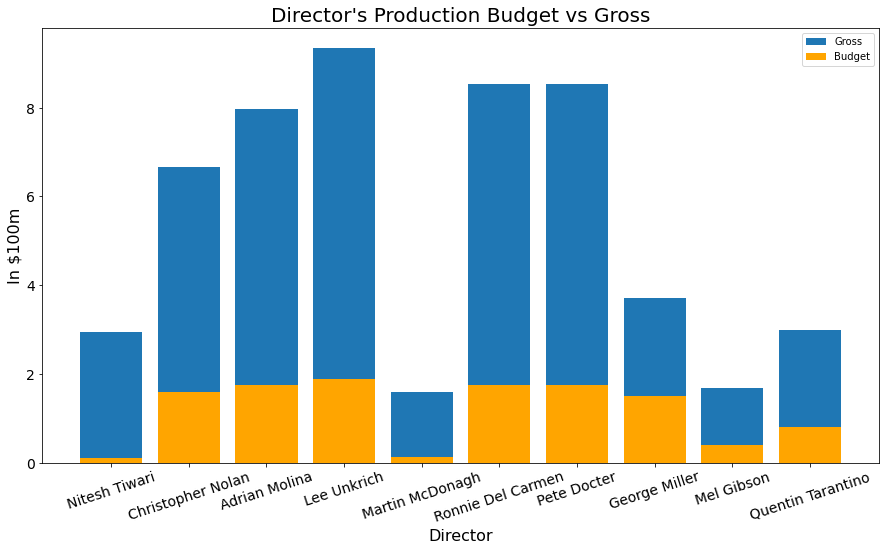

In [52]:
# in notebook version
fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(top_10_directors_names, directors_gross)
ax.bar(top_10_directors_names, director_budget, color='orange')
ax.set_xlabel('Director', Fontsize=16)
ax.set_ylabel('In $100m', Fontsize=16)
ax.set_title('Director\'s Production Budget vs Gross', fontsize=20)
ax.legend(['Gross', 'Budget'])
ax.set_xticklabels(top_10_directors_names, rotation=18, fontsize=14)
ax.set_yticklabels(['0', '2', '4', '6', '8'], fontsize=14);
plt.savefig('../images/Director_avg_budget_vs_avg_gross_figure',bbox_inches='tight')

<ipython-input-53-6dd6c46f69ca>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel('Director', Fontsize=16)
<ipython-input-53-6dd6c46f69ca>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('In $100m', Fontsize=16)
<ipython-input-53-6dd6c46f69ca>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_title('Director\'s Production Budget vs Gross', color='white', Fontsize=20)
<ipython-input-53-6dd6c46f69ca>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10_directors_names, rotation=18, Fontsize=14)
<ipython-input-53-6dd6c46f69ca>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed t

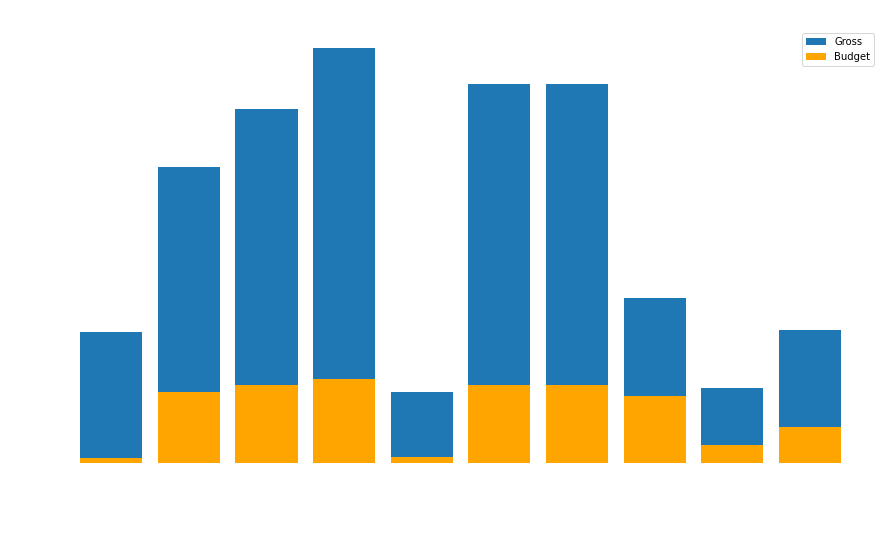

In [53]:
#readme version dark
fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(top_10_directors_names, directors_gross)
ax.bar(top_10_directors_names, director_budget, color='orange')
ax.set_xlabel('Director', Fontsize=16)
ax.set_ylabel('In $100m', Fontsize=16)
ax.set_title('Director\'s Production Budget vs Gross', color='white', Fontsize=20)
ax.legend(['Gross', 'Budget'])
ax.set_xticklabels(top_10_directors_names, rotation=18, Fontsize=14)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.set_yticklabels(['0', '2', '4', '6', '8'], fontsize=14);
plt.savefig('../images/Director_avg_budget_vs_avg_gross_figure_dark',bbox_inches='tight', transparent=True)

<ipython-input-55-73b9db6afb6e>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel('Director', Fontsize=16)
<ipython-input-55-73b9db6afb6e>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('In $100m', Fontsize=16)
<ipython-input-55-73b9db6afb6e>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10_directors_names, rotation=18, Fontsize=14)
<ipython-input-55-73b9db6afb6e>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(top_10_directors_names, rotation=18, Fontsize=14)
<ipython-input-55-73b9db6afb6e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '2', '4', '6', '8'], 

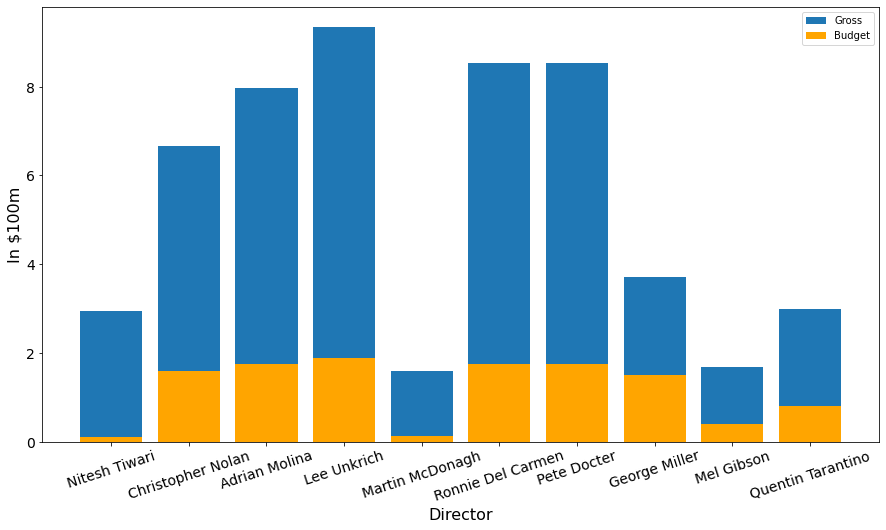

In [55]:
#for powerpoint slide
fig, ax = plt.subplots(figsize = (15, 8))
plt.style.use=('use_dark_background')
ax.bar(top_10_directors_names, directors_gross)
ax.bar(top_10_directors_names, director_budget, color='orange')
ax.set_xlabel('Director', Fontsize=16)
ax.set_ylabel('In $100m', Fontsize=16)
ax.legend(['Gross', 'Budget'])
ax.set_xticklabels(top_10_directors_names, rotation=18, Fontsize=14)
ax.set_yticklabels(['0', '2', '4', '6', '8'], fontsize=14);
plt.savefig('../images/Director_avg_budget_vs_avg_gross_notitle_ppt',bbox_inches='tight')

In [56]:
#director_index = director_avg['Profit_Margin'].index[:10]
#director_index

In [57]:
#director_values = director_avg['Profit_Margin'].values[:10]
#director_values

In [58]:
#director_budget = director_avg['ratio_budget_gross_%'].values[:10]

In [59]:
#fig, ax = plt.subplots(figsize=(10, 5))
#ax.bar(director_index, director_values)
#ax.bar(director_index, director_budget, color='orange')
#ax.set_xticklabels(director_index, rotation=90)
#ax.set_xlabel('Director Average Rating')
#ax.set_ylabel('Director\'s Profit Margin\'s and Budget')
#ax.set_title('Director\'s Profit vs Budget');

In [60]:
#fig, ax = plt.subplots()
#ax.scatter(director_avg['averagerating'], director_avg['ratio_budget_gross_%'], alpha=.3)
#ax.set_xlabel('Director Average Rating')
#ax.set_ylabel('Ratio of Production to Gross')
#ax.set_title('Director Avg Rating vs Ratio of Production to Gross');

In [61]:
#fig, ax = plt.subplots()
#ax.scatter(director_avg['worldwide_gross'], director_avg['averagerating'],  alpha=.3)
#ax.set_xlabel('Director Average Rating')
#ax.set_ylabel('Worldwide Gross')
#ax.set_title('Director Avg Rating vs Worldwide to Gross');

In [62]:
performers_count = performers.groupby('primary_name').count()
performers_count.sort_values(by='title', ascending=False, inplace=True)
performers_count[95:105]

,tconst,title,averagerating,numvotes,category,nconst,release_date,production_budget,domestic_gross,worldwide_gross,Profit_Margin,ratio_budget_gross,ratio_budget_gross_%,release dates,years
primary_name,,,,,,,,,,,,,,,
Kevin Costner,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Zoe Saldana,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
James Marsden,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
James McAvoy,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Anna Faris,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Ethan Hawke,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Jamie Foxx,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Zach Galifianakis,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Michael B. Jordan,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


look at how many movies they've starred in since our start date. Depict trends for each actor. If trend goes down, they're losing it or if they're on the rise. using movie ratings as indicator

In [63]:
#dwayne_johnson = performers[performers['primary_name'] == 'Dwayne Johnson']
#dwayne_johnson.sort_values(by='release dates', ascending=True, inplace=True)

In [64]:
#fig, ax = plt.subplots()
#ax.plot(dwayne_johnson['release dates'], dwayne_johnson['averagerating'])

In [65]:
actor_male = performers[performers['primary_name'] == 'Chris Evans']
actor_male = actor_male.sort_values(by='release dates', ascending=True)

<ipython-input-66-c42dc680a749>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(actor_male['years'], fontsize=14)
<ipython-input-66-c42dc680a749>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8'], fontsize=14);


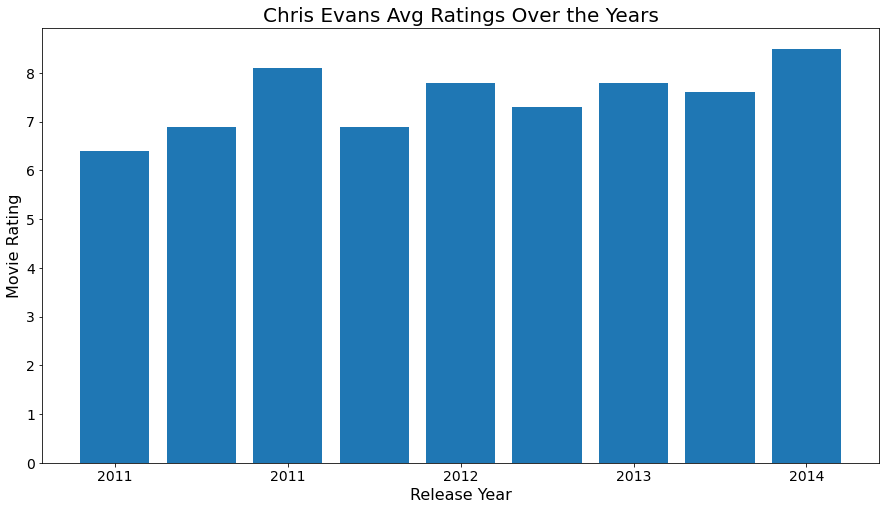

In [66]:
#notebook version
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(actor_male['years'], actor_male['averagerating'])
ax.set_xlabel('Release Year', fontsize=16)
ax.set_ylabel('Movie Rating', fontsize=16)
ax.set_title('Chris Evans Avg Ratings Over the Years', fontsize=20);
ax.set_xticklabels(actor_male['years'], fontsize=14)
ax.set_yticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8'], fontsize=14);
plt.savefig('../images/Chris_evans_ratings_over_years', bbox_inches='tight')

<ipython-input-67-b81c4b3ac847>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(actor_male['years'], fontsize=14)
<ipython-input-67-b81c4b3ac847>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8'], fontsize=14);


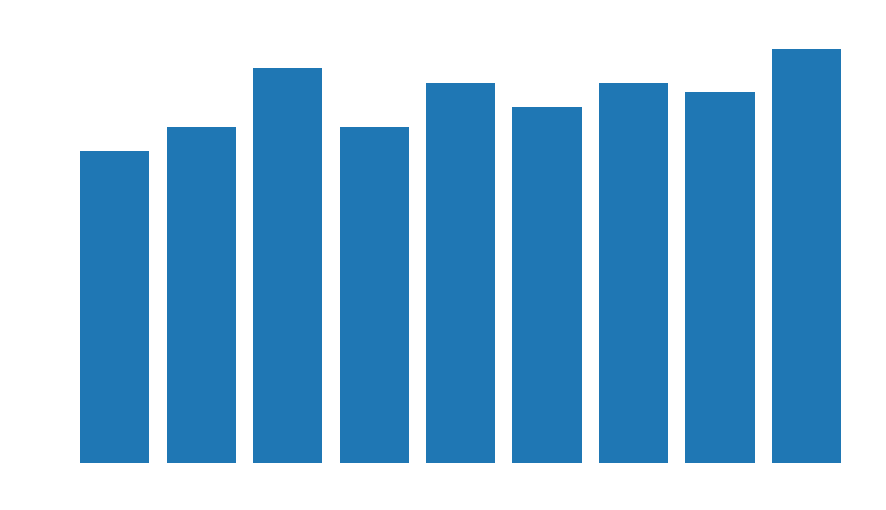

In [67]:
#dark version for readme
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(actor_male['years'], actor_male['averagerating'])
ax.set_xlabel('Release Year', fontsize=16)
ax.set_ylabel('Movie Rating', fontsize=16)
ax.set_title('Chris Evans Avg Ratings Over the Years', fontsize=20, color='white');
ax.set_xticklabels(actor_male['years'], fontsize=14)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.set_yticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8'], fontsize=14);
plt.savefig('../images/Chris_evans_ratings_over_years_dark',bbox_inches='tight', transparent=True)

<ipython-input-68-d69fba486491>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(actor_male['years'], fontsize=14)
<ipython-input-68-d69fba486491>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8'], fontsize=14);


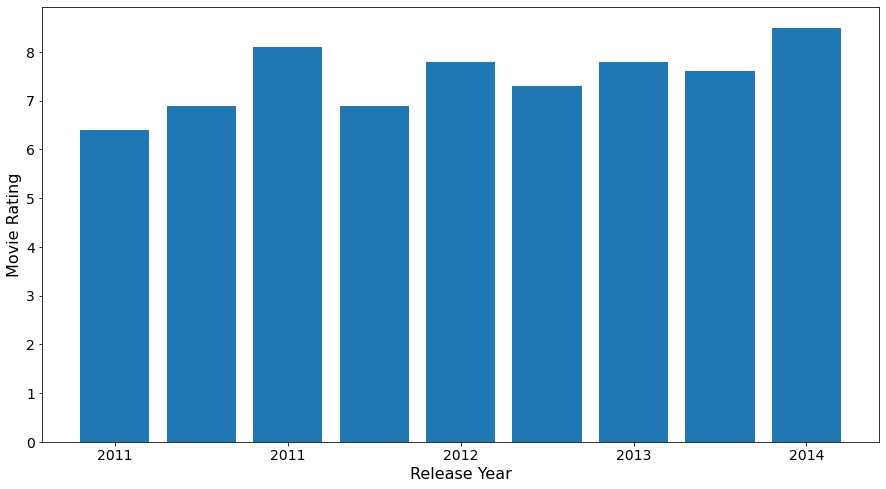

In [68]:
# ppt version
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(actor_male['years'], actor_male['averagerating'])
ax.set_xlabel('Release Year', fontsize=16)
ax.set_ylabel('Movie Rating', fontsize=16)
ax.set_xticklabels(actor_male['years'], fontsize=14)
ax.set_yticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8'], fontsize=14);
plt.savefig('../images/Chris_evans_ratings_over_years_notitle_ppt',bbox_inches='tight')

In [69]:
actor_female = performers[performers['primary_name'] == 'Jennifer Garner']
actor_female = actor_female.sort_values(by='release dates', ascending=True)

<ipython-input-78-fcc1f63dfd65>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], fontsize=14)
<ipython-input-78-fcc1f63dfd65>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8'], fontsize=14);


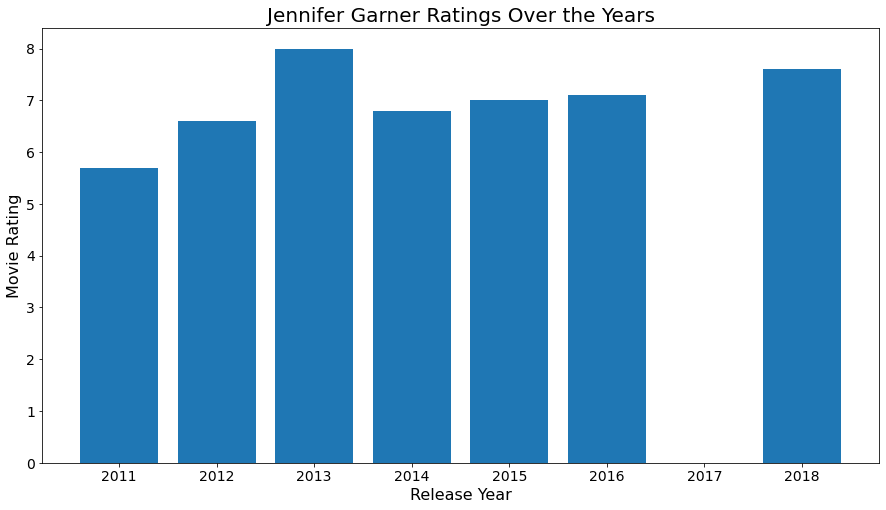

In [78]:
#notebook version
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(actor_female['years'], actor_female['averagerating'] )
ax.set_xlabel('Release Year', fontsize=16)
ax.set_ylabel('Movie Rating', fontsize=16)
ax.set_title('Jennifer Garner Ratings Over the Years', fontsize=20)
ax.set_xticklabels(['0', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], fontsize=14)
ax.set_yticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8'], fontsize=14);
plt.savefig('../images/Jennifer_garner_ratings_over_years',bbox_inches='tight')

<ipython-input-79-eee14186515c>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_title('Jennifer Garner Ratings Over the Years', color='white', Fontsize=20)
<ipython-input-79-eee14186515c>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8'], fontsize=14)
<ipython-input-79-eee14186515c>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], fontsize=14);


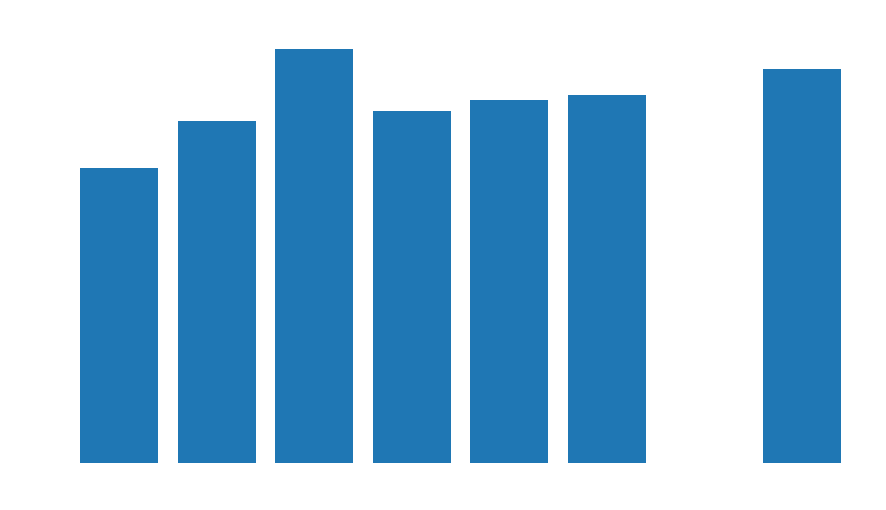

In [79]:
#dark version for readme
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(actor_female['years'], actor_female['averagerating'] )
ax.set_xlabel('Release Year', fontsize=16)
ax.set_ylabel('Movie Rating', fontsize=16)
ax.set_title('Jennifer Garner Ratings Over the Years', color='white', Fontsize=20)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.set_yticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8'], fontsize=14)
ax.set_xticklabels(['0', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], fontsize=14);
plt.savefig('../images/Jennifer_garner_ratings_over_years_dark',bbox_inches='tight', transparent=True)

<ipython-input-72-f30b1e4d1400>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(actor_female['years'], fontsize=14)
<ipython-input-72-f30b1e4d1400>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8'], fontsize=14);


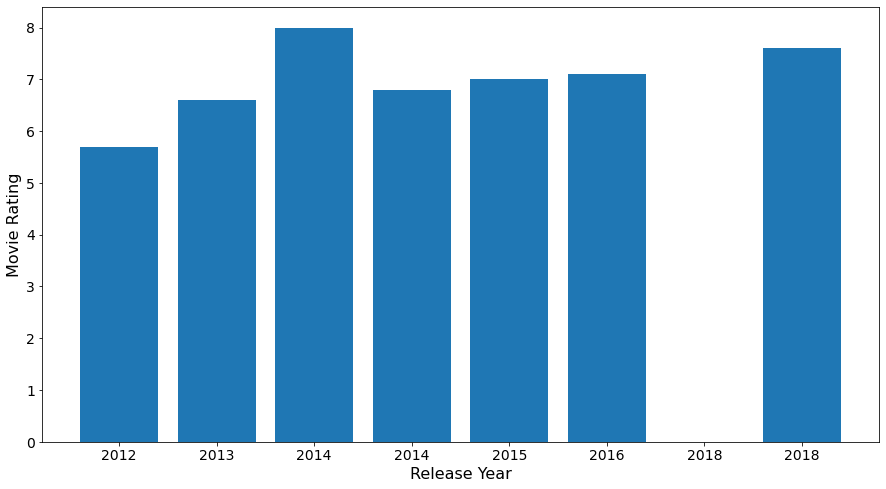

In [72]:
# no title for ppt
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(actor_female['years'], actor_female['averagerating'] )
ax.set_xlabel('Release Year', fontsize=16)
ax.set_ylabel('Movie Rating', fontsize=16)
ax.set_xticklabels(actor_female['years'], fontsize=14)
ax.set_yticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8'], fontsize=14);
plt.savefig('../images/Jennifer_garner_ratings_over_years_notitle_ppt',bbox_inches='tight')

In [73]:
#performers.info()

In [ ]:
#actor_ratings = performers.pivot_table(index='primary_name', columns='years', values='averagerating', aggfunc='mean')

In [ ]:
#actor_ratings.index

In [ ]:
#Matthew_McConaughey = actor_ratings[(actor_ratings.index.get_level_values('primary_name') == "Matthew McConaughey")]
#Matthew_McConaughey

In [ ]:
#fig, ax = plt.subplots()
#ax.plot(Matthew_McConaughey);

In [ ]:
#performers_avg = performers.groupby('primary_name').mean()

In [ ]:
#performers_avg = performers_avg[performers_avg['ratio_production_to_gross'] < 1.00]
#performers_avg.sort_values(by='averagerating', ascending=False, inplace=True)

In [ ]:
#performers_avg[25:50]

In [ ]:
#performers_avg.corr()

Similarly, we can observe a slight negative correlation between the average rating of the performers and the ratio of production budget to gross. This is a good thing as the smaller the ratio  the production to worldwide is, the more profitable the movie. This makes our correlation negative.

In [ ]:
#fig, ax = plt.subplots()
#ax.scatter(performers_avg['averagerating'], performers_avg['ratio_budget_gross'], alpha=.3)
#ax.set_xlabel('Performer Average Rating')
#ax.set_ylabel('Ratio of Production to Gross')
#ax.set_title('Performer Avg Rating vs Ratio of Production to Gross');

In [ ]:
fig, ax = plt.subplots()
ax.scatter(performers_avg['averagerating'], performers_avg['worldwide_gross'], alpha=.2)
ax.set_xlabel('Performer Average Rating')
ax.set_ylabel('Worldwide Gross')
ax.set_title('Performer Avg Rating vs Worldwide Gross');

see correlation between $$ spent and return - scatter

In the plot below, we can see that there's a slightly positive correlation between average rating and worldwide gross. We can also observe that many low budget

list of top actors

In [ ]:
#def actor_info(actor):
#    actor_name = performers[performers['primary_name'] == 'actor']
#    actor_name.sort_values(by='release dates', ascending=True, inplace=True)
#    fig, ax = plt.subplots()
 #   return ax.plot(actor_name['release dates'], actor_name['averagerating'])